In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Profitability Analysis

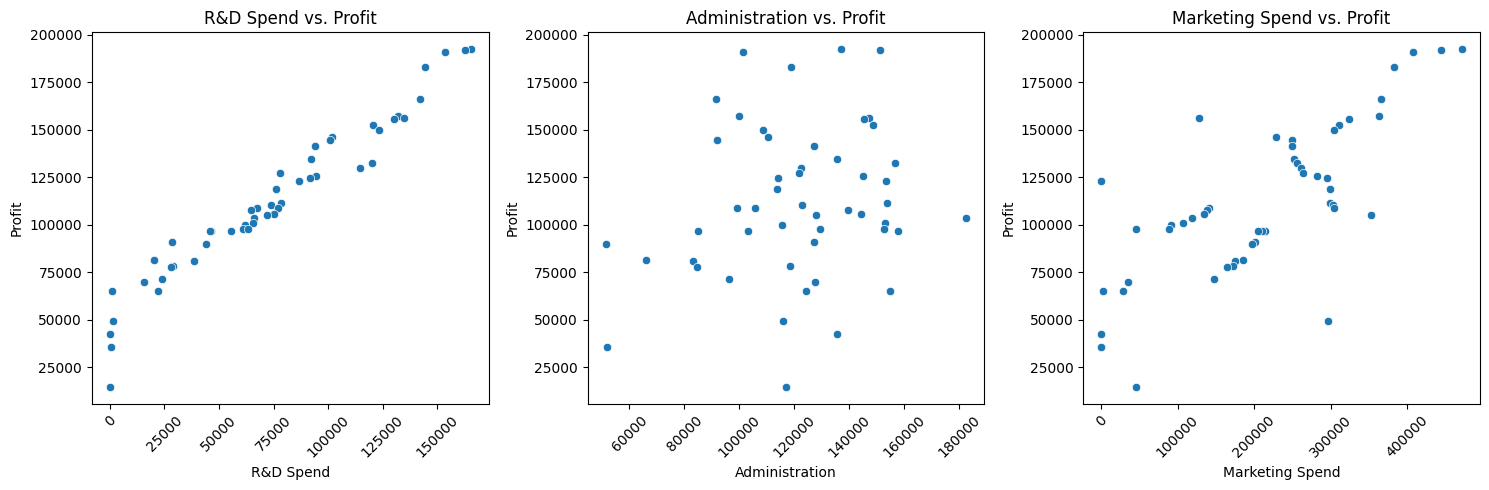

In [3]:
# plotting the graph to show correlation

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='R&D Spend', y='Profit', data=df)
plt.title('R&D Spend vs. Profit')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.scatterplot(x='Administration', y='Profit', data=df)
plt.title('Administration vs. Profit')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.scatterplot(x='Marketing Spend', y='Profit', data=df)
plt.title('Marketing Spend vs. Profit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [4]:
# Map the 'State' column to integer values
state_mapping = {'New York': 0, 'California': 1, 'Florida': 2}
df['State'] = df['State'].map(state_mapping)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


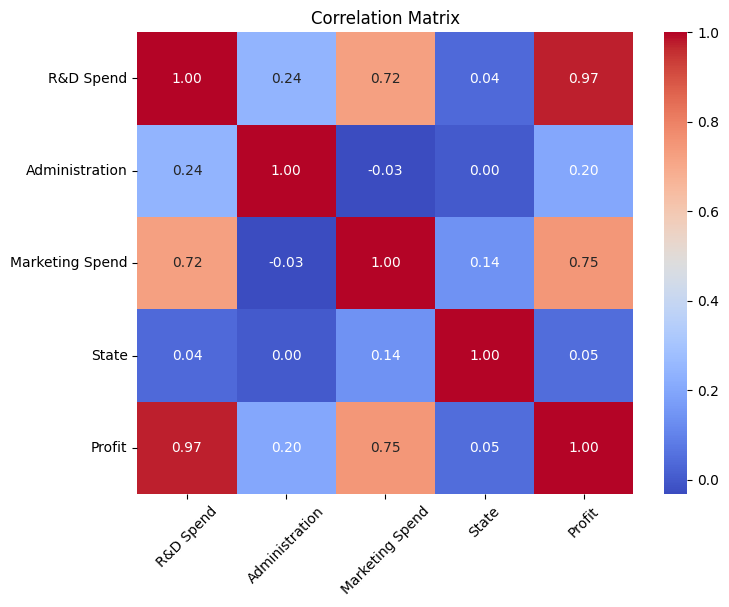

In [5]:
# Correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

## Comparison Across States

In [6]:
# Reload the data and save in a different variable since we have already encoded the state column 
data = pd.read_csv('50_Startups.csv')

# Group by state and calculate mean values
state_group = data.groupby('State').mean()[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].reset_index()
print(state_group)

        State     R&D Spend  Administration  Marketing Spend         Profit
0  California  64657.674118   120746.507059    182540.929412  103905.175294
1     Florida  80724.016250   121768.897500    247323.551250  118774.024375
2    New York  76195.062353   121543.470588    205346.015882  113756.446471


C:\Users\HP FOLIO\AppData\Local\Temp\ipykernel_9356\4238964724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Profit', data=state_group, palette='viridis')


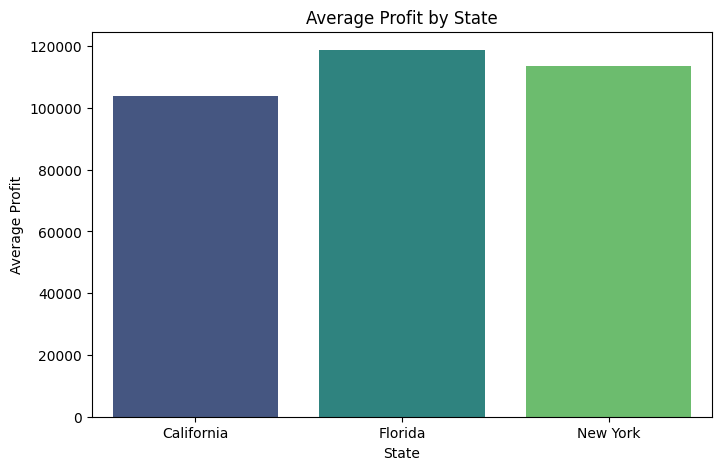

In [7]:
# Bar plot for average profit by state
plt.figure(figsize=(8, 5))
sns.barplot(x='State', y='Profit', data=state_group, palette='viridis')
plt.title('Average Profit by State')
plt.xlabel('State')
plt.ylabel('Average Profit')
plt.show()

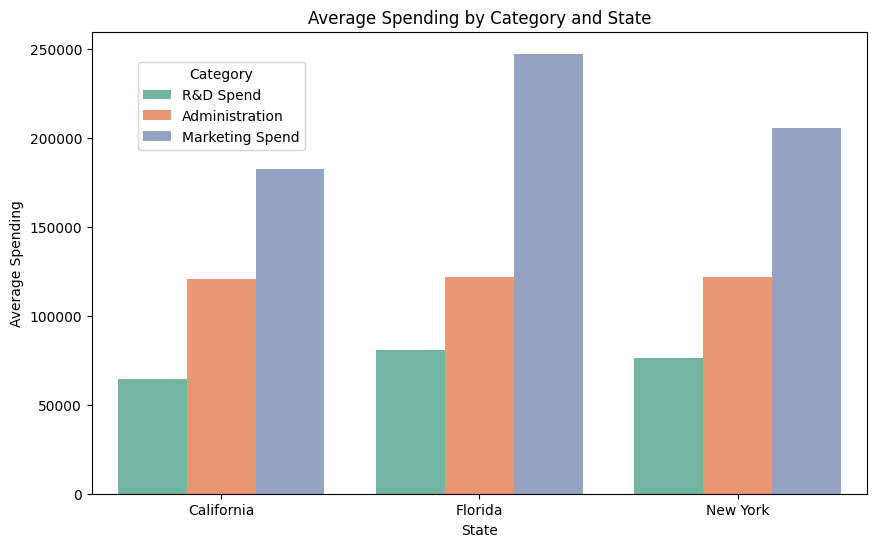

In [8]:
# Multi-bar plot for spending by state
plt.figure(figsize=(10, 6))
state_group_melted = state_group.melt(id_vars="State", value_vars=['R&D Spend', 'Administration', 'Marketing Spend'])
sns.barplot(x='State', y='value', hue='variable', data=state_group_melted, palette='Set2')
plt.title('Average Spending by Category and State')
plt.xlabel('State')
plt.ylabel('Average Spending')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(0.05, 0.95))
plt.show()

C:\Users\HP FOLIO\AppData\Local\Temp\ipykernel_9356\697876446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='R&D Spend', data=data, palette='Blues')
C:\Users\HP FOLIO\AppData\Local\Temp\ipykernel_9356\697876446.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Administration', data=data, palette='Greens')
C:\Users\HP FOLIO\AppData\Local\Temp\ipykernel_9356\697876446.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Marketing Spend', data=data, palette='Oranges')


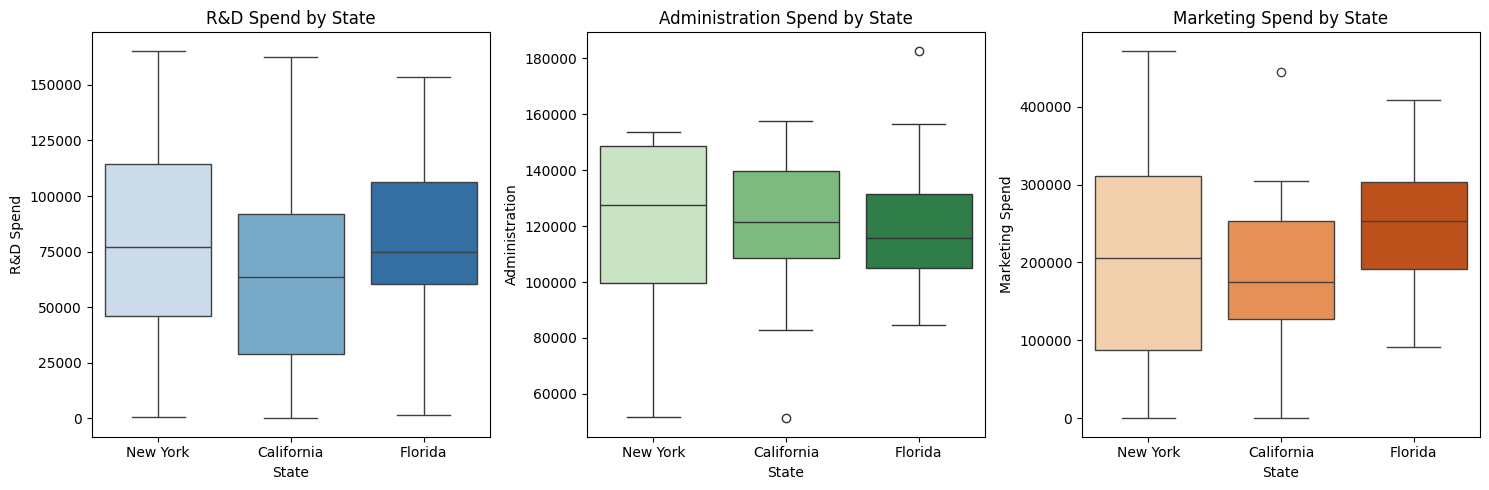

In [9]:
# Box plots to show distribution of spending categories by state
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='State', y='R&D Spend', data=data, palette='Blues')
plt.title('R&D Spend by State')

plt.subplot(1, 3, 2)
sns.boxplot(x='State', y='Administration', data=data, palette='Greens')
plt.title('Administration Spend by State')

plt.subplot(1, 3, 3)
sns.boxplot(x='State', y='Marketing Spend', data=data, palette='Oranges')
plt.title('Marketing Spend by State')

plt.tight_layout()
plt.show()

## Predictive Modelling

In [10]:
# seperating the feature and label
x = df.drop('Profit', axis=1).values

y = df['Profit'].values

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [11]:
# Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

In [12]:
model.predict([[300000,200000,600000,2]])

array([304152.34703829])

In [13]:
model.predict([[220000,150000,150000,0]])

array([224849.41528844])

In [14]:
model.predict([[150000,110000,250000,1]])

array([171465.13167582])

In [15]:
# Checking the accuracy of our model
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.9319316373670643

## Developing Investment Strategies

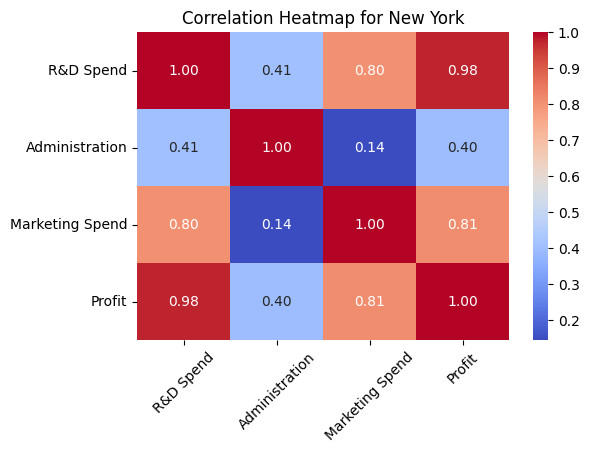

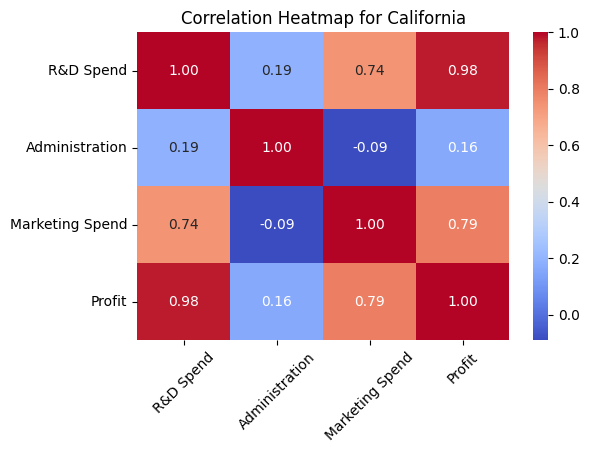

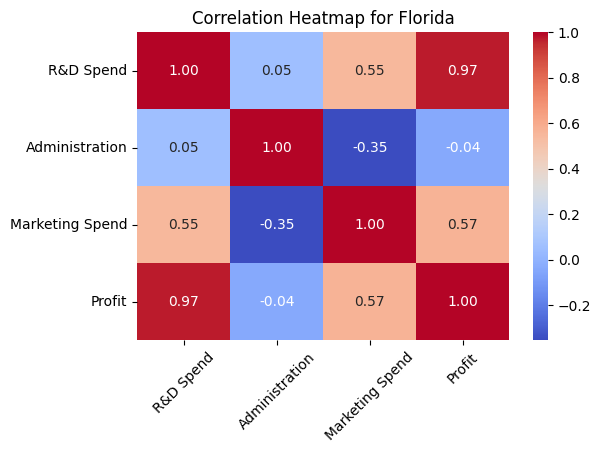

In [16]:
# List of unique states
states = data['State'].unique()

# Plot correlation heatmap for each state
for state in states:
    # Filter data for the specific state
    state_data = data[data['State'] == state]
    
    # Calculate correlation matrix
    corr_matrix = state_data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()
    
    # Plot heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for {state}')
    plt.xticks(rotation=45)
    plt.show()

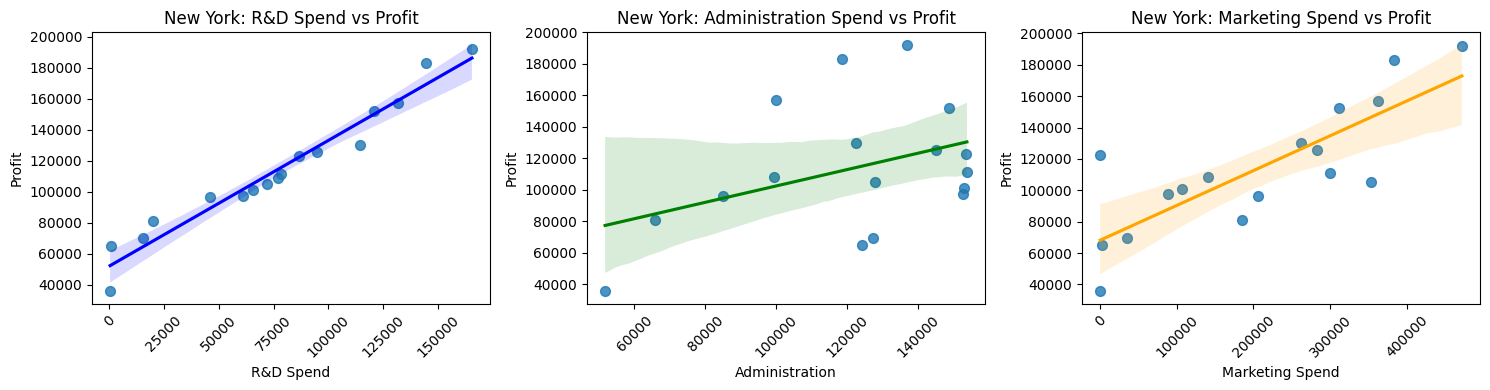

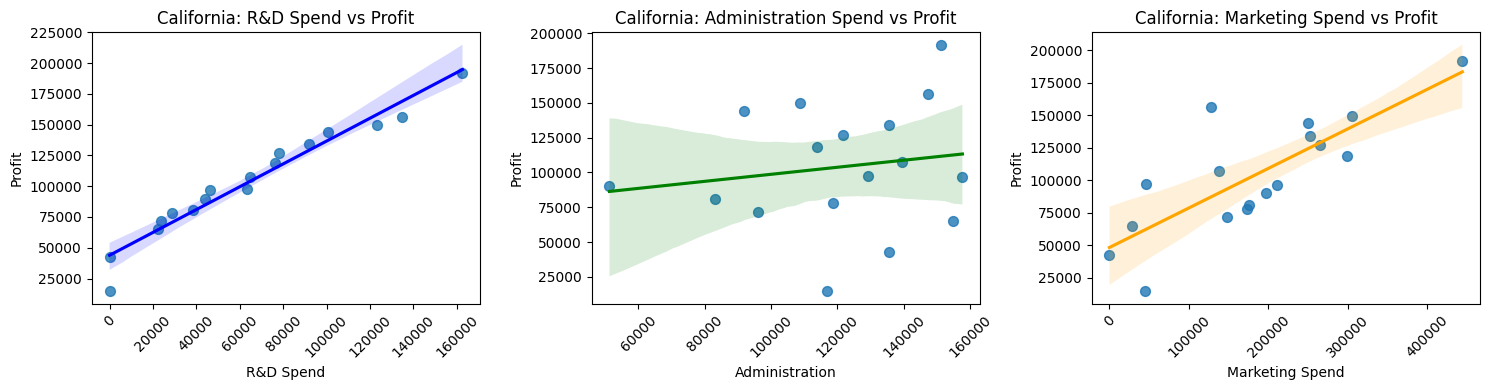

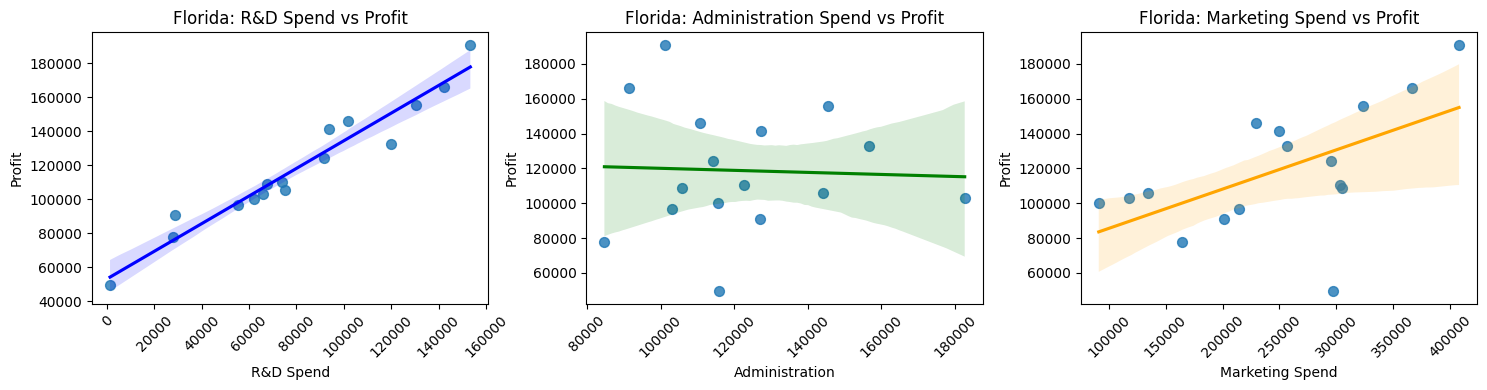

In [17]:
# Regression plots for R&D Spend, Administration, and Marketing Spend vs Profit by State
states = data['State'].unique()

for state in states:
    state_data = data[data['State'] == state]
    
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 3, 1)
    sns.regplot(x='R&D Spend', y='Profit', data=state_data, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
    plt.title(f'{state}: R&D Spend vs Profit')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 2)
    sns.regplot(x='Administration', y='Profit', data=state_data, scatter_kws={'s': 50}, line_kws={'color': 'green'})
    plt.title(f'{state}: Administration Spend vs Profit')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 3)
    sns.regplot(x='Marketing Spend', y='Profit', data=state_data, scatter_kws={'s': 50}, line_kws={'color': 'orange'})
    plt.title(f'{state}: Marketing Spend vs Profit')
    
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

In [18]:
# saving our model
import pickle
pickle.dump(model, open('model.pkl', 'wb'))